In [22]:
from hydra import initialize, compose
import json
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from pathlib import Path
from enz_rxn_data.mechanism import get_overall_reaction
from ergochem.draw import draw_reaction, draw_molecule
from IPython.display import SVG

In [23]:
with initialize(version_base=None, config_path="./conf/filepaths"):
    filepaths = compose(config_name="filepaths")

In [24]:
with open(Path(filepaths.raw_data) / "mcsa" / "entries_0.json", "r") as f:
    entries = json.load(f)
    entry_id = '49'
    entry_49 = entries[entry_id]['reaction']

In [25]:
with open(Path(filepaths.raw_mcsa) / "entries_7.json", "r") as f:
    entries = json.load(f)

    entry_id = '722'
    entry_722 = entries[entry_id]['reaction']

[16:23:26] WARNING: not removing hydrogen atom without neighbors


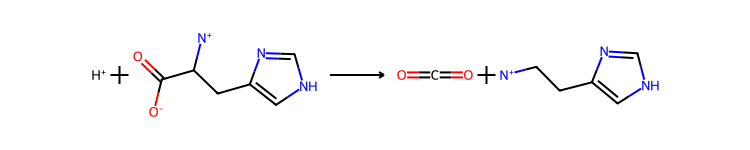

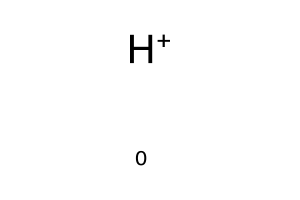

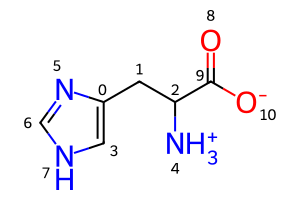

In [26]:
def display_mech_labeled_rxn(cpds, mol_path, involved_atoms):
    lhs, rhs = get_overall_reaction(cpds, mol_path)
    rxn = AllChem.ReactionFromSmarts(
        ".".join([Chem.MolToSmarts(mol) for mol in lhs]) + ">>" +
        ".".join([Chem.MolToSmarts(mol) for mol in rhs]),
        useSmiles=True,
    )
    display(rxn)
    for i, rct in enumerate(lhs):
        display(SVG(draw_molecule(rct, size=(300, 200), highlight_atoms=involved_atoms[i], draw_options={"addAtomIndices": True})))


involved_49 = {
    0:[],
    1:[],
}
display_mech_labeled_rxn(entry_49['compounds'], Path(filepaths.mcsa_mols), involved_49)

[16:23:27] WARNING: not removing hydrogen atom without neighbors


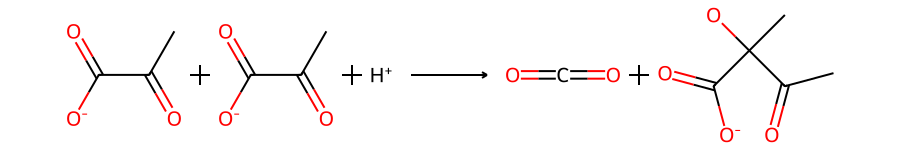

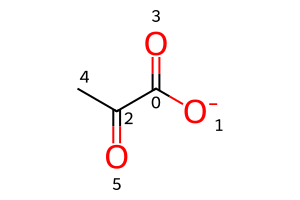

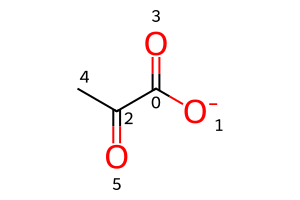

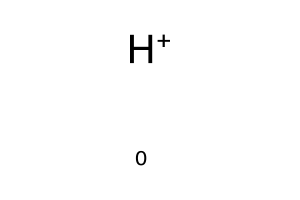

In [27]:
involved_722 = {
    0:[],
    1:[],
    2:[],
}
display_mech_labeled_rxn(entry_722['compounds'], Path(filepaths.mcsa_mols), involved_722)

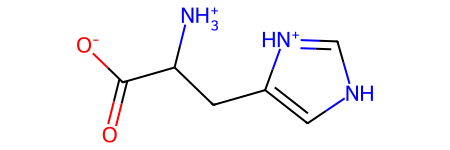

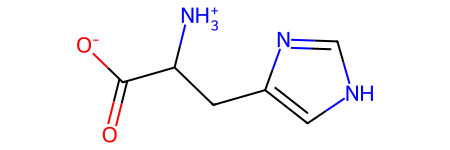

11 11


In [28]:
query = Chem.MolFromSmiles('[H][NH2+]C(Cc1c[nH]c[nH+]1)C(=O)[O-]')
mol = Chem.MolFromSmiles('[NH3+]C(Cc1c[nH]cn1)C(=O)[O-]')
display(query), display(mol)
print(query.GetNumAtoms(), mol.GetNumAtoms())

In [29]:
Chem.MolToSmiles(query)

'[NH3+]C(Cc1c[nH]c[nH+]1)C(=O)[O-]'

In [30]:
Chem.CalcNumHeavyAtoms(query)

AttributeError: module 'rdkit.Chem' has no attribute 'CalcNumHeavyAtoms'

In [ ]:
mol.GetSubstructMatch(query)

()

In [ ]:
from ergochem.standardize import standardize_mol

In [ ]:
standardize_mol(mol).GetSubstructMatch(standardize_mol(query))

(1, 0, 7, 8, 2, 3, 4, 5, 6, 9, 10)

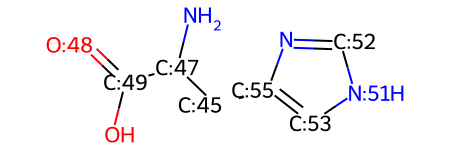

In [ ]:
standardize_mol(query)

In [ ]:
print(standardize_mol(mol).GetNumAtoms(), standardize_mol(query).GetNumAtoms())

11 11


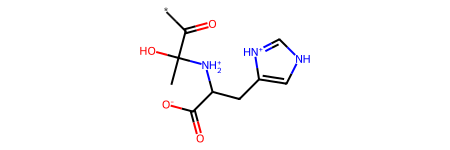

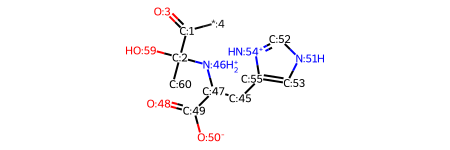

17 17


In [ ]:
mol = Chem.MolFromSmiles('*C(=O)C(C)([NH2+]C(Cc1c[nH]c[nH+]1)C(=O)[O-])O[H]')
query = Chem.MolFromSmiles('[C:1]([C:2]([N+:46]([CH:47]([CH2:45][c:55]1[cH:53][nH:51][cH:52][nH+:54]1)[C:49](=[O:48])[O-:50])([H:61])[H:62])([O:59][H:57])[CH3:60])(=[O:3])[*:4]')
display(mol), display(query)
print(mol.GetNumAtoms(), query.GetNumAtoms())

In [ ]:
len(mol.GetSubstructMatch(query))

17

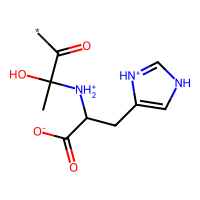

In [ ]:
SVG(draw_molecule('*C(=O)C(C)([NH2+]C(Cc1c[nH]c[nH+]1)C(=O)[O-])O[H]'))

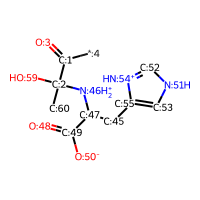

In [ ]:
SVG(draw_molecule('[C:1]([C:2]([N+:46]([CH:47]([CH2:45][c:55]1[cH:53][nH:51][cH:52][nH+:54]1)[C:49](=[O:48])[O-:50])([H:61])[H:62])([O:59][H:57])[CH3:60])(=[O:3])[*:4]'))

In [ ]:
from lxml import etree

In [ ]:
file_path = '/home/stef/enz_rxn_data/data/raw/mcsa/mech_steps/219_2_1.mrv'
tree = etree.parse(file_path)
root = tree.getroot()

In [ ]:
root

<Element {http://www.chemaxon.com}cml at 0x7f6b7d3cda80>

In [ ]:
dir(root)

['__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_init',
 'addnext',
 'addprevious',
 'append',
 'attrib',
 'base',
 'clear',
 'cssselect',
 'extend',
 'find',
 'findall',
 'findtext',
 'get',
 'getchildren',
 'getiterator',
 'getnext',
 'getparent',
 'getprevious',
 'getroottree',
 'index',
 'insert',
 'items',
 'iter',
 'iterancestors',
 'iterchildren',
 'iterdescendants',
 'iterfind',
 'itersiblings',
 'itertext',
 'keys',
 'makeelement',
 'nsmap',
 'prefix',
 'remove',
 'replace',
 'set',
 'sourceline',
 'tag',
 'tail',
 'text',
 'values',
 'xp

In [ ]:
txt = etree.tostring(root, pretty_print=True).decode()

In [ ]:
with open('test.mrv', 'w') as f:
    f.write(txt)

In [61]:
from lxml import etree

# Parse the XML file
tree = etree.parse('/home/stef/enz_rxn_data/test.mrv')
root = tree.getroot()
print(root.nsmap)

# Define the namespace
# Define the namespace
tag_ns = root.tag.split('}')
if len(tag_ns) == 1:
    tag = ''
    ns = None
elif len(tag_ns) == 2:
    tag = tag_ns[-1] + ':'
    ns = {tag.strip(':') : tag_ns[0].strip('{')}

# Find all atom elements
# atoms = root.findall('.//cml:atom', namespaces=ns)
atoms = root.xpath(f".//{tag}atom", namespaces=ns)

# Create a dictionary to store atom elements
atom_dict = {}

# Iterate through each atom element and add it to the dictionary
for atom in atoms:
    atom_id = atom.get('id')
    atom_dict[atom_id] = {
        'elementType': atom.get('elementType'),
        'x2': atom.get('x2'),
        'y2': atom.get('y2'),
        'mrvAlias': atom.get('mrvAlias'),
        'mrvExtraLabel': atom.get('mrvExtraLabel'),
        'lonePair': atom.get('lonePair'),
        'formalCharge': atom.get('formalCharge')
    }

# Print the dictionary
print(atom_dict)

{None: 'http://www.chemaxon.com', 'xsi': 'http://www.w3.org/2001/XMLSchema-instance'}
{'a1': {'elementType': 'C', 'x2': '8.60486659782773', 'y2': '0.36091999711263867', 'mrvAlias': 'His258A', 'mrvExtraLabel': None, 'lonePair': None, 'formalCharge': None}, 'a2': {'elementType': 'C', 'x2': '8.284546600390293', 'y2': '-1.1452933241709893', 'mrvAlias': None, 'mrvExtraLabel': 'res:His258A', 'lonePair': None, 'formalCharge': None}, 'a3': {'elementType': 'C', 'x2': '6.819959945440321', 'y2': '-1.6212933203629873', 'mrvAlias': None, 'mrvExtraLabel': 'res:His258A', 'lonePair': None, 'formalCharge': None}, 'a4': {'elementType': 'C', 'x2': '6.344146615913491', 'y2': '-3.0858799753129595', 'mrvAlias': None, 'mrvExtraLabel': 'res:His258A', 'lonePair': None, 'formalCharge': None}, 'a5': {'elementType': 'N', 'x2': '4.804146628233493', 'y2': '-3.0858799753129595', 'mrvAlias': None, 'mrvExtraLabel': 'res:His258A', 'lonePair': '1', 'formalCharge': None}, 'a6': {'elementType': 'C', 'x2': '4.3281466320414

In [60]:
ns

{'': 'http://www.chemaxon.com'}

In [58]:
tag_ns = root.tag.split('}')
if len(tag_ns) == 1:
    tag = ''
    ns = None
elif len(tag_ns) == 2:
    tag = tag_ns[-1] + ':'
    ns = {tag[-1]: tag_ns[0].strip('{')}

tag, ns

('cml:', {':': 'http://www.chemaxon.com'})

In [ ]:
# Extract atoms
atoms = {}
for atom in root.xpath('//atomArray/atom'):
    atom_data = {
        'id': atom.get('id'),
        'element_type': atom.get('elementType'),
        'x': atom.get('x2'),
        'y': atom.get('y2'),
        'lone_pair': atom.get('lonePair'),
        'formal_charge': atom.get('formalCharge', 0),
        'mrv_alias': atom.get('mrvAlias'),
        'rgroup_ref': atom.get('rgroupRef'),
        'mrv_extra_label': atom.get('mrvExtraLabel')
    }
    catom = CmlAtom(**atom_data)
    atoms[catom.id] = catom

# Extract bonds
bonds = {}
for bond in root.xpath('//bondArray/bond'):
    bond_data = {
        'id': bond.get('id'),
        'atom_refs': tuple(bond.get('atomRefs2').split(' ')),
        'order': bond.get('order'),
        'convention': bond.get('convention')
    }
    cbond = CmlBond(**bond_data)
    bonds[cbond.atom_refs] = cbond

# Extract MEFlow elements
meflows = {}
for meflow in root.xpath('//MEFlow'):
    from_to = [child.get('atomRef') or child.get('atomRefs') for child in meflow]
    from_to = [elt.replace('m1.', '') for elt in from_to if elt is not None]
    meflow_data = {
        'id': meflow.get('id'),
        'from_': tuple(from_to[0].split(' ')) if len(from_to) > 0 else None,
        'to': tuple(from_to[1].split(' ')) if len(from_to) > 1 else None,
    }
    cmeflow = CmlMEFlow(**meflow_data)
    meflows[cmeflow.id] = cmeflow

In [35]:
root.tag

'{http://www.chemaxon.com}cml'

In [62]:
from lxml import etree

# Parse the XML file
tree = etree.parse('/home/stef/enz_rxn_data/data/raw/mcsa/mech_steps/49_1_1.mrv')
root = tree.getroot()

# Define the namespace
tag_ns = root.tag.split('}')
if len(tag_ns) == 1:
    tag = ''
    ns = None
elif len(tag_ns) == 2:
    tag = tag_ns[-1] + ':'
    ns = {tag.strip(':') : tag_ns[0].strip('{')}

# Find all atom elements
atoms = root.findall(f".//{tag}atom", namespaces=ns)

# Create a dictionary to store atom elements
atom_dict = {}

# Iterate through each atom element and add it to the dictionary
for atom in atoms:
    atom_id = atom.get('id')
    atom_dict[atom_id] = {
        'elementType': atom.get('elementType'),
        'x2': atom.get('x2'),
        'y2': atom.get('y2'),
        'mrvAlias': atom.get('mrvAlias'),
        'mrvExtraLabel': atom.get('mrvExtraLabel'),
        'lonePair': atom.get('lonePair'),
        'formalCharge': atom.get('formalCharge')
    }

# Print the dictionary
print(atom_dict)

{'a1': {'elementType': 'C', 'x2': '8.450624879719854', 'y2': '-7.9924424852075235', 'mrvAlias': None, 'mrvExtraLabel': None, 'lonePair': None, 'formalCharge': None}, 'a2': {'elementType': 'C', 'x2': '9.990624879719853', 'y2': '-7.9924424852075235', 'mrvAlias': None, 'mrvExtraLabel': None, 'lonePair': None, 'formalCharge': None}, 'a3': {'elementType': 'O', 'x2': '7.680624879719854', 'y2': '-9.32612160703556', 'mrvAlias': None, 'mrvExtraLabel': None, 'lonePair': '2', 'formalCharge': None}, 'a4': {'elementType': 'R', 'x2': '7.680624879719854', 'y2': '-6.658763363379484', 'mrvAlias': 'Pyr1F', 'mrvExtraLabel': None, 'lonePair': None, 'formalCharge': None}, 'a5': {'elementType': 'C', 'x2': '21.789125252380167', 'y2': '0.5038249316842172', 'mrvAlias': 'Tyr62A', 'mrvExtraLabel': None, 'lonePair': None, 'formalCharge': None}, 'a6': {'elementType': 'C', 'x2': '22.559010536686472', 'y2': '-0.8297879518942328', 'mrvAlias': None, 'mrvExtraLabel': None, 'lonePair': None, 'formalCharge': None}, 'a7':

In [47]:
root.nsmap

{}

In [48]:
root.tag.split('}')

['cml']

In [ ]:
tree = etree.parse('/home/stef/enz_rxn_data/data/raw/mcsa/mech_steps/219_1_1.mrv')
root = tree.getroot()
print(root.nsmap, root.tag)

{} cml


In [40]:
tree = etree.parse('/home/stef/enz_rxn_data/data/raw/mcsa/mech_steps/219_2_1.mrv')
root = tree.getroot()
print(root.nsmap, root.tag)

{None: 'http://www.chemaxon.com', 'xsi': 'http://www.w3.org/2001/XMLSchema-instance'} {http://www.chemaxon.com}cml
